In [1]:
# Import storiks.plot
import storiks.plot as plot

# Load default options
options = plot.Options()

In [2]:
# List all experiment files in the output directory (/output inside storiks container)
!ls *.out*

exp_01-ycsb_workloadb.out.xz
exp_02-ycsb_workloadb-pressure_iodepth_n1bs4rr100wr000.out.xz
exp_03-iodepth_bs4rr100wr000.out.xz


In [3]:
# Load steady-state experiment files (exp_01*)
af1 = plot.AllFiles(
    'exp_01',
    options,
    plot.getFiles('.', str_filter='exp_01'))
af1.print_files()

File Name                      : Label
--------------------------------------------------
./exp_01-ycsb_workloadb.out.xz : YCSB B


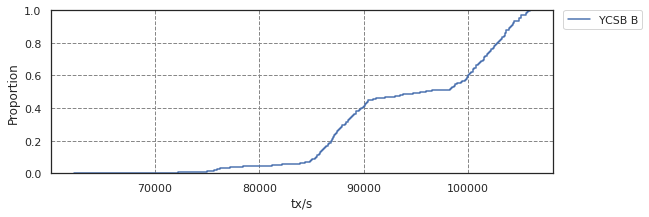

In [4]:
# Plot the CDF of the database performance
af1.graph_ecdf()

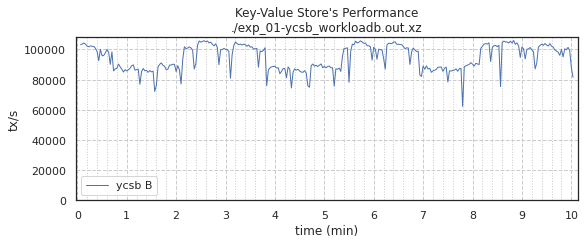

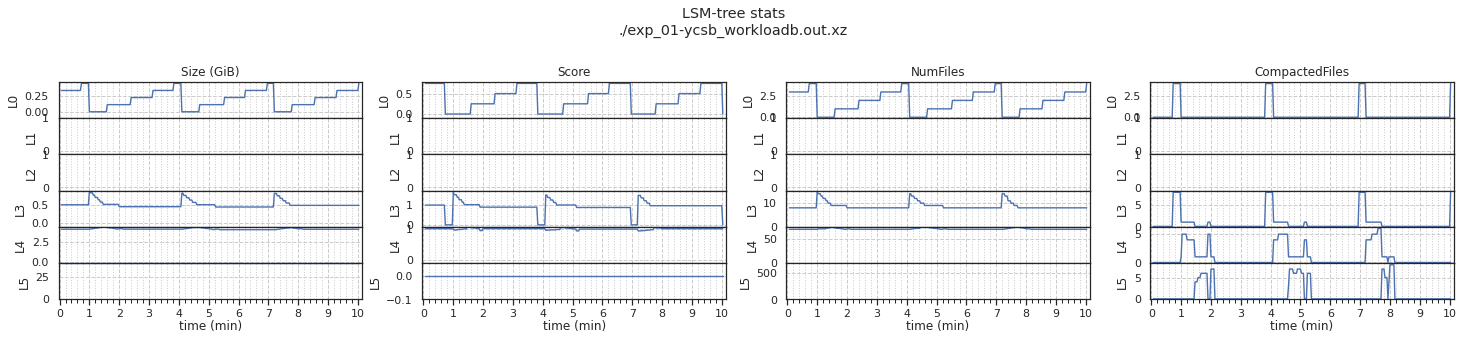

In [5]:
# Plot database performance and LSM-tree statistics
for f in af1:
    f.graph_db()
    f.graph_ycsb_lsm_stats()

In [6]:
# Load pressure experiment files (exp_02*)
af2 = plot.AllFiles(
    'exp_02',
    options(w_labels=['d0', 'd1']+[f'd{i}' for i in range(2,66,2)]),
    plot.getFiles('.', str_filter='exp_02'))
af2.print_files()

File Name                                                       : Label
-----------------------------------------------------------------------------------
./exp_02-ycsb_workloadb-pressure_iodepth_n1bs4rr100wr000.out.xz : YCSB B + iodepth wr0.0


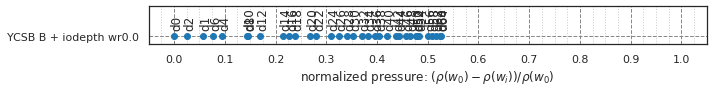

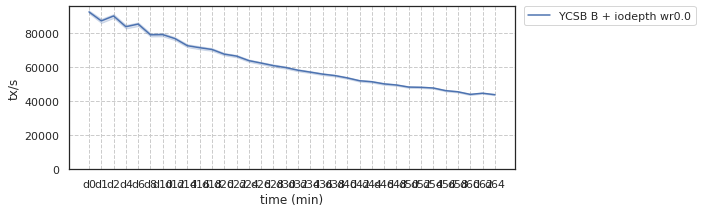

In [7]:
# Plot all normalized pressure and database throughput
af2.graph_pressure()
af2.graph_dbmean()

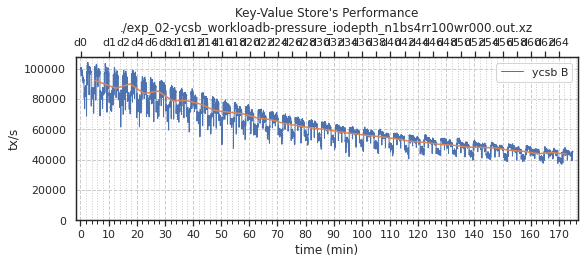

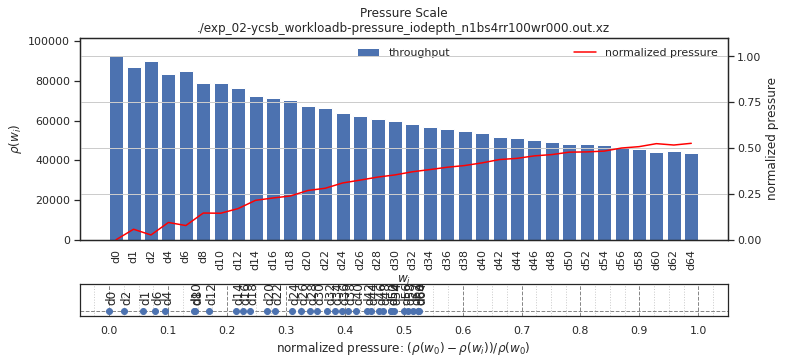

In [8]:
# Per experiment graphs:

for f in af2: f.graph_db()
for f in af2: f.graph_pressure()
# for f in af2: f.graph_cpu()
# for f in af2: f.graph_io()
# for f in af2: f.graph_db_summary()

In [9]:
af3 = plot.AllFiles(
    'exp_03',
    options(w_labels=['d1']+[f'd{i}' for i in range(2,66,2)]),
    plot.getFiles('', str_filter='exp_03'))
af3.print_files()

File Name                             : Label
---------------------------------------------------------
./exp_03-iodepth_bs4rr100wr000.out.xz : exp_03-iodepth_bs4rr100wr000


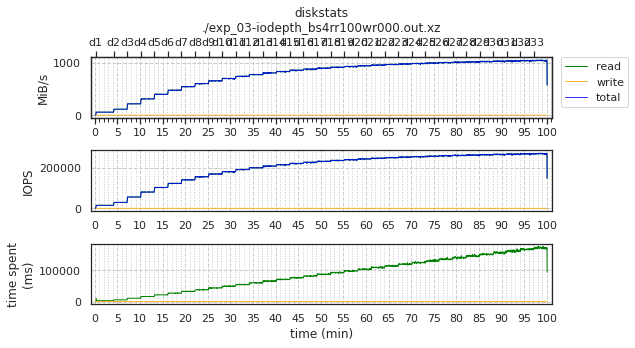

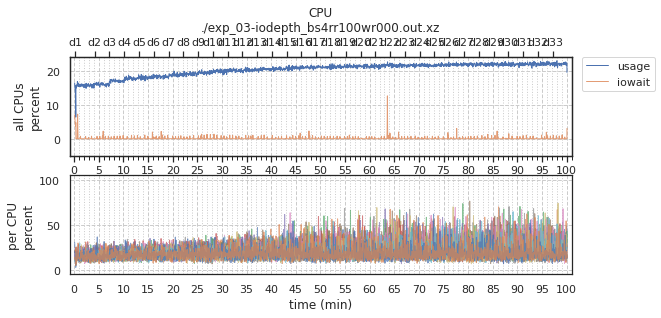

In [10]:
for f in af3: f.graph_io()
for f in af3: f.graph_cpu()